# Galaxy Zoo - The Galaxy Challenge

- INPUT: 299x299
- Model: Xception
- pooling: GlobalAverage
- OUTPUT: 37class to reflect Decision Tree by Functional API

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../input/galaxy-zoo-the-galaxy-challenge/all_ones_benchmark.zip
../input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip
../input/galaxy-zoo-the-galaxy-challenge/central_pixel_benchmark.zip
../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
../input/galaxy-zoo-the-galaxy-challenge/all_zeros_benchmark.zip
../input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip


In [2]:
!unzip -n ../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip

Archive:  ../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
   creating: images_training_rev1/
  inflating: images_training_rev1/100008.jpg  
  inflating: images_training_rev1/100023.jpg  
  inflating: images_training_rev1/100053.jpg  
  inflating: images_training_rev1/100078.jpg  
  inflating: images_training_rev1/100090.jpg  
  inflating: images_training_rev1/100122.jpg  
  inflating: images_training_rev1/100123.jpg  
  inflating: images_training_rev1/100128.jpg  
  inflating: images_training_rev1/100134.jpg  
  inflating: images_training_rev1/100143.jpg  
  inflating: images_training_rev1/100150.jpg  
  inflating: images_training_rev1/100157.jpg  
  inflating: images_training_rev1/100187.jpg  
  inflating: images_training_rev1/100204.jpg  
  inflating: images_training_rev1/100237.jpg  
  inflating: images_training_rev1/100259.jpg  
  inflating: images_training_rev1/100263.jpg  
  inflating: images_training_rev1/100288.jpg  
  inflating: images_training_rev1/100295.jp

In [3]:
!unzip -n ../input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip

Archive:  ../input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip
   creating: images_test_rev1/
  inflating: images_test_rev1/100018.jpg  
  inflating: images_test_rev1/100037.jpg  
  inflating: images_test_rev1/100042.jpg  
  inflating: images_test_rev1/100052.jpg  
  inflating: images_test_rev1/100056.jpg  
  inflating: images_test_rev1/100058.jpg  
  inflating: images_test_rev1/100062.jpg  
  inflating: images_test_rev1/100065.jpg  
  inflating: images_test_rev1/100071.jpg  
  inflating: images_test_rev1/100076.jpg  
  inflating: images_test_rev1/100084.jpg  
  inflating: images_test_rev1/100085.jpg  
  inflating: images_test_rev1/100094.jpg  
  inflating: images_test_rev1/100104.jpg  
  inflating: images_test_rev1/100171.jpg  
  inflating: images_test_rev1/100183.jpg  
  inflating: images_test_rev1/100186.jpg  
  inflating: images_test_rev1/100190.jpg  
  inflating: images_test_rev1/100208.jpg  
  inflating: images_test_rev1/100222.jpg  
  inflating: images_test_rev1/100229.

In [4]:
from tqdm import tqdm
import zipfile
import io
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.transform import resize

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras import backend as K

In [6]:
pd.options.display.max_columns = 999
df = pd.read_csv('../input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip')
df.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  Class5.1  Class5.2  Class5.3  Class5.4  \
0  0.578401  0.418398  0.198455       0.0  0.104752  0.512101  0.000000   
1  0.165229  0.591328  0.041271       0.0  0.236781  0.160941  0.234877   
2  0.177352  0.000000  0.177352       0.0  0.117790  0.059562  0.000000   
3  0.129071  0.189098  0.049466       0.0  0.000000  0.113284  0.125280   
4  0.000000  0.000000  0.000000       0.0  0.000000  0.000000  0.000000   

   Class6.1  Class6.2  Class7.1  Class7.2  Class7.3  Class8.1  Class8.2  \
0  0.054453  0.945547  0.201463  0.181684  0.000000       0.0  0.027226   
1  0.189149  0.810851  0.000000  0.135082  0.191919       0.0  0.000000   
2  0.000000  1.000000  0.000000  0.741864  0.023853       0.0  0.000000   
3  0.320398  0.679602  0.408599  0.284778  0.000000       0.0  0.000000   
4  0.029383  0.970617  0.494587  0.439252  0.000000       0.0  0.000000   

   Class8.3  Class8.4  Class8.5  Class8.6  Class8.7  Class9.1  Class9.2  \
0  0.000000  0.027226  0.000000  0.000000       0.0  0.000000       0.0   
1  0.140353  0.000000  0.048796  0.000000       0.0  0.012414       0.0   
2  0.000000  0.000000  0.000000  0.000000       0.0  0.000000       0.0   
3  0.096119  0.096119  0.000000  0.128159       0.0  0.000000       0.0   
4  0.000000  0.000000  0.000000  0.029383       0.0  0.000000       0.0   

   Class9.3  Class10.1  Class10.2  Class10.3  Class11.1  Class11.2  Class11.3  \
0  0.000000   0.279952   0.138445   0.000000   0.000000   0.092886        0.0   
1  0.018764   0.000000   0.131378   0.459950   0.000000   0.591328        0.0   
2  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3  0.000000   0.094549   0.000000   0.094549   0.189098   0.000000        0.0   
4  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

   Class11.4  Class11.5  Class11.6  
0        0.0        0.0   0.325512  
1        0.0        0.0   0.000000  
2        0.0        0.0   0.000000  
3        0.0        0.0   0.000000  
4        0.0        0.0   0.000000

In [7]:
df.describe()

GalaxyID      Class1.1      Class1.2      Class1.3      Class2.1  \
count   61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean   550179.708337      0.432526      0.542261      0.025213      0.106408   
std    258724.130197      0.283517      0.296429      0.037967      0.212505   
min    100008.000000      0.000000      0.000000      0.000000      0.000000   
25%    327874.250000      0.175812      0.280862      0.000000      0.000000   
50%    551933.000000      0.416994      0.558754      0.014870      0.000000   
75%    773232.000000      0.679182      0.811339      0.034325      0.085161   
max    999967.000000      1.000000      1.000000      0.935147      1.000000   

           Class2.2      Class3.1      Class3.2      Class4.1      Class4.2  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.435854      0.102526      0.333328      0.215629      0.220224   
std        0.301867      0.177301      0.247675      0.285502      0.179835   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.168490      0.000000      0.122592      0.000000      0.072656   
50%        0.394850      0.000000      0.289248      0.092987      0.183640   
75%        0.694615      0.134555      0.516800      0.330231      0.338920   
max        1.000000      1.000000      1.000000      1.000000      0.957937   

           Class5.1      Class5.2      Class5.3      Class5.4      Class6.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.040842      0.180468      0.177904      0.036639      0.231807   
std        0.087419      0.192508      0.180277      0.060300      0.227393   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.066087   
50%        0.000000      0.116580      0.126765      0.000000      0.149545   
75%        0.044376      0.290133      0.284554      0.057294      0.326943   
max        0.803556      0.965112      0.891034      0.650383      1.000000   

           Class6.2      Class7.1      Class7.2      Class7.3      Class8.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.768193      0.170021      0.207765      0.054740      0.034812   
std        0.227393      0.238860      0.215967      0.110445      0.101319   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.673057      0.000000      0.032554      0.000000      0.000000   
50%        0.850455      0.035954      0.125757      0.000000      0.000000   
75%        0.933913      0.280679      0.333788      0.049136      0.027767   
max        1.000000      1.000000      1.000000      0.883481      0.969157   

           Class8.2      Class8.3      Class8.4      Class8.5      Class8.6  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.013449      0.032807      0.040044      0.064546      0.042307   
std        0.027435      0.051930      0.081152      0.090286      0.108537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.034163      0.000000   
75%        0.025160      0.046129      0.044907      0.086541      0.032199   
max        0.807733      0.598390      0.860000      0.790470      0.971000   

           Class8.7      Class9.1      Class9.2      Class9.3     Class10.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.003842      0.063014      0.010614      0.032780      0.091801   
std        0.024408      0.137545      0.038236      0.098200      0.145125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000 

In [8]:
# df = df.sample(n=1000, random_state=0)

In [9]:
DATA_DIR = '../input/galaxy-zoo-the-galaxy-challenge/'
zippath = '../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip'
ORIG_SIZE = 424
# IMG_SIZE = 224
IMG_SIZE = 299
# IMG_SIZE = 424

batch_size = 32
# batch_size = 16

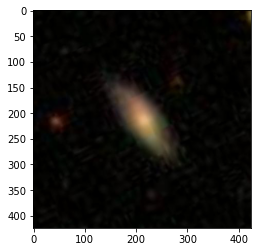

In [10]:
# load zip
zippath = '../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip'
z = zipfile.ZipFile(zippath)

# load image from zip
# imgname = 'images_training_rev1/100008.jpg'
imgname = 'images_training_rev1/100023.jpg'
im = Image.open(io.BytesIO(z.read(imgname)))
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

z.close()

In [11]:
im_list.shape

(424, 424, 3)

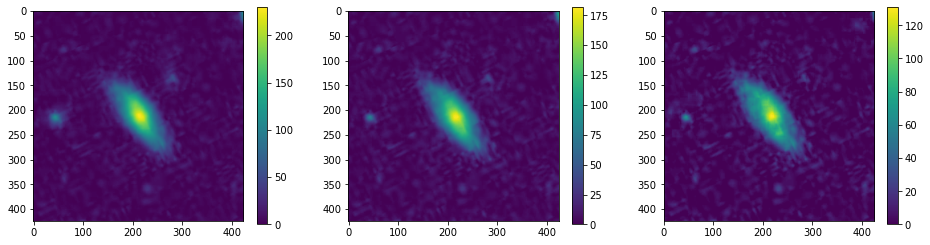

In [12]:
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(im_list[:,:,i])
    plt.colorbar()
plt.show()

## tf.data.Dataset を使う

In [13]:
def preprocess_image(image, augment_flag=False):
    image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)  # 中央crop
    if augment_flag:
        image = tf.image.random_flip_left_right(image)  # 左右反転
        image = tf.image.random_flip_up_down(image)     # 上下反転
    image /= 255  # normalize to [0,1] range

    return image

In [14]:
def load_and_preprocess_image(path):
#     img_path = '../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1/' + path + '.jpg'
    img_path = 'images_training_rev1/' + path + '.jpg'
    image = tf.io.read_file(img_path)
    return preprocess_image(image,  augment_flag=True)

In [15]:
# import matplotlib.pyplot as plt

# label = str(df.iloc[1, 0])
# # label = '303732'
# # img_path = '../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1/' + label + '.jpg'

# plt.imshow(load_and_preprocess_image(label))
# plt.grid(False)
# plt.title(label)
# plt.colorbar()
# plt.show()

In [16]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(df.values[:,0].astype(int).astype(str), df.values[:,1:], test_size=0.2, random_state=0)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49262,), (12316,), (49262, 37), (12316, 37))

In [18]:
path_ds = tf.data.Dataset.from_tensor_slices(x_train)

In [19]:
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [20]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [21]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y_train, tf.float32))

In [22]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [23]:
# ds = image_label_ds.cache(filename='./cache.tf-data')
# ds = image_label_ds.cache()
ds = image_label_ds
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=1000))
ds = ds.batch(batch_size)

In [24]:
path_ds_valid = tf.data.Dataset.from_tensor_slices(x_test)
image_ds_valid = path_ds_valid.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds_valid = tf.data.Dataset.from_tensor_slices(tf.cast(y_test, tf.float32))
ds_valid = tf.data.Dataset.zip((image_ds_valid, label_ds_valid))
ds_valid = ds_valid.batch(batch_size)

In [25]:
y_test.shape

(12316, 37)

In [26]:
# for x in image_ds:
# for x, y in image_label_ds:
for x, y in ds:
#     print(x.shape)
    print(x.shape, y.shape)
    break

(32, 299, 299, 3) (32, 37)


## Model

In [27]:
# ネットワークの構築
from tensorflow.keras.applications import VGG16, ResNet50, ResNet50V2, MobileNetV2, EfficientNetB0, InceptionResNetV2, Xception
from tensorflow.keras import models, layers, regularizers

# conv_base = VGG16(weights='imagenet',
# conv_base = ResNet50(weights='imagenet',
# conv_base = ResNet50V2(weights='imagenet',
# conv_base = MobileNetV2(weights='imagenet',
# conv_base = EfficientNetB0(weights='imagenet',
# conv_base = InceptionResNetV2(weights='imagenet',
conv_base = Xception(weights='imagenet',
                 include_top=False, pooling='avg',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))
conv_base.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [28]:
conv_base.input_shape

(None, 299, 299, 3)

In [29]:
df.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  Class5.1  Class5.2  Class5.3  Class5.4  \
0  0.578401  0.418398  0.198455       0.0  0.104752  0.512101  0.000000   
1  0.165229  0.591328  0.041271       0.0  0.236781  0.160941  0.234877   
2  0.177352  0.000000  0.177352       0.0  0.117790  0.059562  0.000000   
3  0.129071  0.189098  0.049466       0.0  0.000000  0.113284  0.125280   
4  0.000000  0.000000  0.000000       0.0  0.000000  0.000000  0.000000   

   Class6.1  Class6.2  Class7.1  Class7.2  Class7.3  Class8.1  Class8.2  \
0  0.054453  0.945547  0.201463  0.181684  0.000000       0.0  0.027226   
1  0.189149  0.810851  0.000000  0.135082  0.191919       0.0  0.000000   
2  0.000000  1.000000  0.000000  0.741864  0.023853       0.0  0.000000   
3  0.320398  0.679602  0.408599  0.284778  0.000000       0.0  0.000000   
4  0.029383  0.970617  0.494587  0.439252  0.000000       0.0  0.000000   

   Class8.3  Class8.4  Class8.5  Class8.6  Class8.7  Class9.1  Class9.2  \
0  0.000000  0.027226  0.000000  0.000000       0.0  0.000000       0.0   
1  0.140353  0.000000  0.048796  0.000000       0.0  0.012414       0.0   
2  0.000000  0.000000  0.000000  0.000000       0.0  0.000000       0.0   
3  0.096119  0.096119  0.000000  0.128159       0.0  0.000000       0.0   
4  0.000000  0.000000  0.000000  0.029383       0.0  0.000000       0.0   

   Class9.3  Class10.1  Class10.2  Class10.3  Class11.1  Class11.2  Class11.3  \
0  0.000000   0.279952   0.138445   0.000000   0.000000   0.092886        0.0   
1  0.018764   0.000000   0.131378   0.459950   0.000000   0.591328        0.0   
2  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3  0.000000   0.094549   0.000000   0.094549   0.189098   0.000000        0.0   
4  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

   Class11.4  Class11.5  Class11.6  
0        0.0        0.0   0.325512  
1        0.0        0.0   0.000000  
2        0.0        0.0   0.000000  
3        0.0        0.0   0.000000  
4        0.0        0.0   0.000000

In [30]:
# Functional API
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate, Multiply
from tensorflow.keras.activations import softmax, sigmoid
from tensorflow.keras import Model

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = conv_base(inputs)
x = Flatten()(x)
x = Dense(37, kernel_initializer='he_normal')(x)

# Galaxy Zoo の Decision Tree の条件をモデルに反映
x01 = softmax(x[:,:3])                             # Task01 合計が1.0
x02 = Multiply()([softmax(x[:, 3: 5]), x01[:,1]])  # Task02 合計がTask01の2つ目
x03 = Multiply()([softmax(x[:, 5: 7]), x02[:,1]])  # Task03 合計がTask02の2つ目
x04 = Multiply()([softmax(x[:, 7: 9]), x02[:,1]])  # Task04 合計がTask02の2つ目
x05 = Multiply()([softmax(x[:, 9:13]), x04[:,1]])  # Task05 合計がTask04の2つ目
x06 = Multiply()([softmax(x[:,13:15]), x04[:,1]])  # Task06 合計がTask04の2つ目
x07 = Multiply()([softmax(x[:,15:18]), x01[:,0]])  # Task07 合計がTask01の1つ目
x08 = Multiply()([softmax(x[:,18:25]), x06[:,0]])  # Task08 合計がTask06の1つ目
x09 = Multiply()([softmax(x[:,25:28]), x02[:,0]])  # Task09 合計がTask02の1つ目
x10 = Multiply()([softmax(x[:,28:31]), x04[:,0]])  # Task10 合計がTask04の1つ目
x11 = Multiply()([softmax(x[:,31:37]), x04[:,0]])  # Task11 合計がTask04の1つ目

outputs = Concatenate(axis=1)([x01, x02, x03, x04, x05, x06, x07, x08, x09, x10, x11])
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, 2048)         20861480    input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 2048)         0           xception[0][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 37)           75813       flatten[0][0]                    
______________________________________________________________________________________________

In [31]:
# for layer in conv_base.layers:
#     print(layer.name)

In [32]:
# 凍結
# conv_base.trainable = False

# 最初から特定の層までを凍結
# conv_base.trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block14_sepconv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

len(model.trainable_weights)

156

In [33]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [34]:
# オプティマイザ構築
from tensorflow.keras import optimizers

model.compile(loss='MeanSquaredError',
#              optimizer=optimizers.RMSprop(lr=1e-4),
             optimizer=optimizers.RMSprop(lr=1e-3),
#              optimizer=optimizers.Adam(lr=1e-4),
#              optimizer=optimizers.Adam(lr=1e-3),
#              optimizer=optimizers.SGD(lr=0.01),
#              optimizer=optimizers.SGD(lr=0.01, momentum=0.9),
             metrics=['acc', root_mean_squared_error])

In [35]:
%%time
# history = model.fit(ds, epochs=5, steps_per_epoch=10, use_multiprocessing=True, workers=8, 
#                     validation_steps=10, validation_data=ds_valid)
history = model.fit(ds, epochs=5, steps_per_epoch=x_train.shape[0]//batch_size, use_multiprocessing=True, workers=8, 
                    validation_steps=x_test.shape[0]//batch_size, validation_data=ds_valid)
# history = model.fit(ds, epochs=20, steps_per_epoch=61578//32+1, workers=0, validation_steps=1, validation_data=ds_valid, initial_epoch=2)

Epoch 1/5
1539/1539 [==============================] - 1314s 844ms/step - loss: 0.0247 - acc: 0.3109 - root_mean_squared_error: 0.1561 - val_loss: 0.0240 - val_acc: 0.3290 - val_root_mean_squared_error: 0.1547
Epoch 2/5
1539/1539 [==============================] - 1299s 844ms/step - loss: 0.0186 - acc: 0.3306 - root_mean_squared_error: 0.1363 - val_loss: 0.0190 - val_acc: 0.3333 - val_root_mean_squared_error: 0.1377
Epoch 3/5
1539/1539 [==============================] - 1300s 844ms/step - loss: 0.0177 - acc: 0.3319 - root_mean_squared_error: 0.1329 - val_loss: 0.0186 - val_acc: 0.3295 - val_root_mean_squared_error: 0.1361
Epoch 4/5
1539/1539 [==============================] - 1301s 845ms/step - loss: 0.0172 - acc: 0.3332 - root_mean_squared_error: 0.1311 - val_loss: 0.0174 - val_acc: 0.3420 - val_root_mean_squared_error: 0.1319
Epoch 5/5
1539/1539 [==============================] - 1302s 846ms/step - loss: 0.0168 - acc: 0.3345 - root_mean_squared_error: 0.1295 - val_loss: 0.0171 - val_

In [36]:
y_pred = model.predict(ds_valid, use_multiprocessing=True, workers=8, verbose=1, steps=1)

1/1 [==============================] - 1s 1s/step


In [37]:
idx = 2
print(y_pred[idx])
print(sum(y_pred[idx,:3]), sum(y_pred[idx,3:5]), sum(y_pred[idx,5:7]), sum(y_pred[idx,7:9]), sum(y_pred[idx,9:13]), 
      sum(y_pred[idx,13:15]), sum(y_pred[idx,15:18]), sum(y_pred[idx,18:25]), sum(y_pred[idx,25:28]), sum(y_pred[idx,28:31]), 
      sum(y_pred[idx,31:37]))

[2.1347208e-01 2.0023537e-01 5.8629256e-01 1.0474547e-02 1.8976082e-01
 6.4555995e-02 1.2520483e-01 1.6651562e-03 1.8809566e-01 3.1419810e-02
 5.6083817e-02 5.3817835e-02 4.6774205e-02 9.2229247e-02 9.5866412e-02
 1.2564215e-01 7.6210126e-02 1.1619797e-02 2.5028762e-04 6.0771585e-05
 5.4983277e-04 1.0110644e-02 7.6692007e-02 4.5251511e-03 4.0549876e-05
 6.3555902e-03 5.4688728e-04 3.5720698e-03 2.2532625e-04 4.7623014e-04
 9.6359989e-04 1.8951780e-04 3.8077141e-04 2.1191256e-05 1.1537302e-05
 1.1109482e-05 1.0510291e-03]
1.0000000149011612 0.2002353658899665 0.18976082652807236 0.18976081523578614 0.18809566646814346 0.18809565901756287 0.21347207389771938 0.092229244120972 0.010474547278136015 0.0016651562764309347 0.0016651563228151645


In [38]:
model.evaluate(ds_valid)

385/385 [==============================] - 81s 211ms/step - loss: 0.0171 - acc: 0.3405 - root_mean_squared_error: 0.1305


[0.01705954596400261, 0.3405326306819916, 0.1305203139781952]

In [39]:
model.save('my_model.h5')

In [40]:
history.history

{'loss': [0.021476363763213158,
  0.01832754537463188,
  0.017550049349665642,
  0.017097674310207367,
  0.016733868047595024],
 'acc': [0.32458171248435974,
  0.33154645562171936,
  0.333109974861145,
  0.3344298303127289,
  0.3354451060295105],
 'root_mean_squared_error': [0.14601802825927734,
  0.13525281846523285,
  0.13236486911773682,
  0.1306563913822174,
  0.12926480174064636],
 'val_loss': [0.023968709632754326,
  0.019004397094249725,
  0.018557792529463768,
  0.01741613633930683,
  0.017080944031476974],
 'val_acc': [0.3290201723575592,
  0.3333333432674408,
  0.3295084536075592,
  0.342041015625,
  0.3409830629825592],
 'val_root_mean_squared_error': [0.15466980636119843,
  0.1377241164445877,
  0.13610531389713287,
  0.1318676918745041,
  0.13060203194618225]}

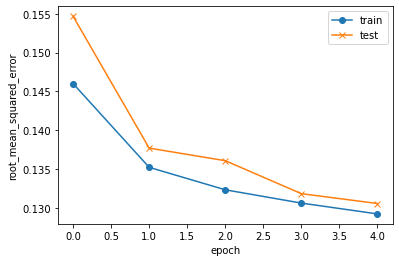

In [41]:
plt.plot(history.history["root_mean_squared_error"], label="train", ls="-", marker="o")
plt.plot(history.history["val_root_mean_squared_error"], label="test", ls="-", marker="x")
plt.ylabel("root_mean_squared_error")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

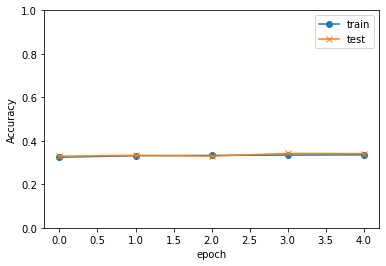

In [42]:
#acc, val_accのプロット
plt.plot(history.history["acc"], label="train", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="test", ls="-", marker="x")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## Submission

In [43]:
submission = pd.read_csv('../input/galaxy-zoo-the-galaxy-challenge/all_ones_benchmark.zip')

In [44]:
# submission = submission.sample(n=1000, random_state=0)

In [45]:
submission.shape

(79975, 38)

In [46]:
def load_and_preprocess_test_image(path):
#     img_path = '../input/galaxy-zoo-the-galaxy-challenge/images_test_rev1/' + path + '.jpg'
    img_path = 'images_test_rev1/' + path + '.jpg'
    image = tf.io.read_file(img_path)
    return preprocess_image(image)

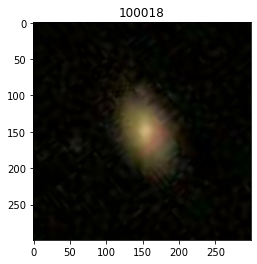

In [47]:
import matplotlib.pyplot as plt

label = str(submission.iloc[0, 0])

plt.imshow(load_and_preprocess_test_image(label))
plt.grid(False)
plt.title(label)
print()

In [48]:
path_ds_test = tf.data.Dataset.from_tensor_slices(submission.values[:,0].astype(int).astype(str))
image_ds_test = path_ds_test.map(load_and_preprocess_test_image, num_parallel_calls=AUTOTUNE)
label_ds_test = tf.data.Dataset.from_tensor_slices(tf.cast(np.zeros((submission.shape[0], 37)), tf.float32))
ds_test = tf.data.Dataset.zip((image_ds_test, label_ds_test))
ds_test = ds_test.batch(batch_size)

In [49]:
# y_pred = model.predict(test_x)
y_pred = model.predict(ds_test, use_multiprocessing=True, workers=8, verbose=1)

2500/2500 [==============================] - 498s 199ms/step


In [50]:
submission.iloc[:, 1:] = y_pred

In [51]:
submission.to_csv('submission.csv', index=False)